In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read image

In [ ]:
# img is a variable
# using cv2.IMREAD_GRAYSCALE specifies reading as grayscale, i.e. single channel
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MLFA/Lab 2/lena_grayscale.png',cv2.IMREAD_GRAYSCALE)

In [ ]:
img.shape

(256, 256)

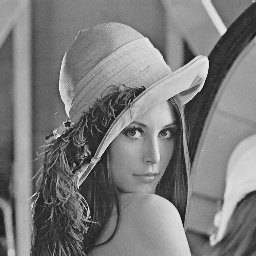

In [ ]:
cv2_imshow(img)

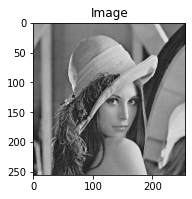

In [ ]:
plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Image')
plt.show()

Write image

In [ ]:
cv2.imwrite('test-image.png',img)

True

Calculate histogram

In [ ]:
# [img] : array of images, here just one
# [0] : specifying that we are only calculating for one channel
# None : No masking
# [256] : We are considering all possible pixel values
# [0, 256] : Provided Range of pixel values
histr = cv2.calcHist([img],[0],None, [256], [0,256])

# channels = cv2.split(imgc)
# print(histr)

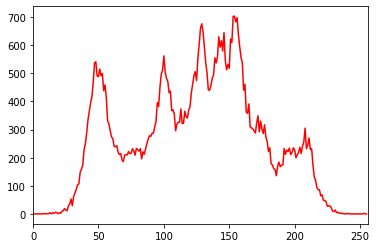

In [ ]:
plt.plot(histr,color = 'red')
plt.xlim([0,256])
plt.show()

# Reading the image as a grayscale ensures we deal with only one dimension
# How frequently a pixel value is occuring in the image

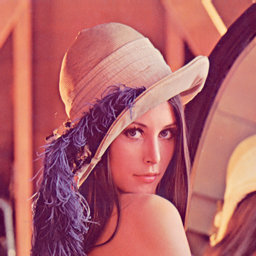

In [ ]:
imgc = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MLFA/Lab 2/lena_color.png')
cv2_imshow(imgc)

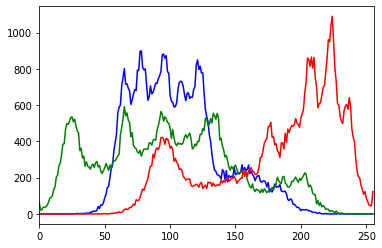

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgc],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# Transposing the 2D matrix
img = img.T

In [ ]:
#img[200:255,200:255] = 0

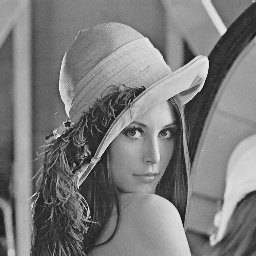

In [ ]:
cv2_imshow(img)

shuffle

In [ ]:
np.random.shuffle(img)

In [ ]:
print(img)

[[108 107 106 ... 154 152 151]
 [ 81  77  74 ... 209 208 208]
 [ 36  44  54 ...  97 101 105]
 ...
 [106 101  98 ... 152 152 152]
 [157 156 156 ...  46  44  50]
 [ 94  95  95 ... 158 160 161]]


In [ ]:
img.shape

(256, 256)

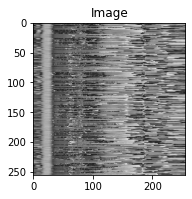

In [ ]:
plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Image')
plt.show()

image flip

In [ ]:
img1 = cv2.flip(img, -1) #0, 1 and -1

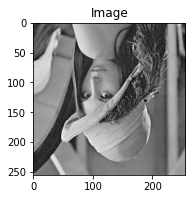

In [ ]:
plt.subplot(121),plt.imshow(img1, cmap = 'gray'),plt.title('Image')
plt.show()

image resize

In [ ]:
img1 = cv2.resize(img,(4*img.shape[0], 4*img.shape[1]),interpolation = cv2.INTER_LINEAR)

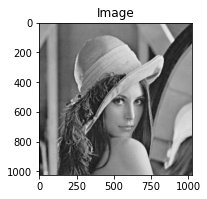

In [ ]:
plt.subplot(121),plt.imshow(img1, cmap = 'gray'),plt.title('Image')
plt.show()

# Affine transformations

translation

In [ ]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,100]])

In [ ]:
img1 = cv2.warpAffine(img,M,(cols,rows))

In [ ]:
plt.subplot(121),plt.imshow(img1),plt.title('Image')
plt.show()

reflection as an affine transform

In [ ]:
input_pts = np.float32([[0,0], [cols-1,0], [0,rows-1]])
output_pts = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
 
# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts , output_pts)
img1 = cv2.warpAffine(img, M, (cols,rows))

In [ ]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(img1),plt.title('Output')
plt.show()

playing with affine transforms

In [ ]:
input_pts = np.float32([[0,0], [cols-1,0], [0,rows-1]])
output_pts = np.float32([[0,100],[cols-1,0], [0,rows-1]])
 
# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts , output_pts)
img1 = cv2.warpAffine(img, M, (cols,rows))

In [ ]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(img1),plt.title('Output')
plt.show()

rotation

In [ ]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),60,1)
img1 = cv2.warpAffine(img, M, (cols,rows))

In [ ]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(img1),plt.title('Output')
plt.show()

# Image filtering

smoothing

In [ ]:
img1 =cv2.GaussianBlur(img,(5,5),0,cv2.BORDER_DEFAULT)

In [ ]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(img1),plt.title('Output')
plt.show()

contrast enhancement

In [ ]:
equ = cv2.equalizeHist(img)

In [ ]:
plt.plot(equ,color = 'red')
plt.xlim([0,256])
plt.show()

In [ ]:
img1 = equ

In [ ]:
equ.shape

In [ ]:
cv2.imwrite('test-image-enh.png',equ)

In [ ]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(img1),plt.title('Output')
plt.show()